Import necessary modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

## (a)

Construct functions for calculating Lagrange's interpolation.

In [2]:
def L_k (x ,k, xp):
    prod = 1
    xk = xp[k]
    for i in range(0,len(xp)):
        if i != k:
            prod *= (x - xp[i]) / (xk - xp[i])
    return prod

In [3]:
def lagrange (x, xp, yp):
    res = 0
    for k in range(0,len(xp)):
        res +=  yp[k] * L_k(x, k, xp)
    return res

## (b)

Let's test our implementations.

In [4]:
def test_lagrange(points):
    """
    points: a list of points with x and y values
    """
    n = len(points)
    res = []
    xp = [point[0] for point in points]
    yp = [point[1] for point in points]
    for point in points:
        cres = abs(point[1] - lagrange(point[0], xp, yp))
        res.append(cres)
    return res

In [5]:
x = np.linspace(0, 2 * pi, 5)
y = np.sin(x)
points = [(x[i], y[i]) for i in range(5)]

test_lagrange(points)

[0.0, 0.0, 0.0, 0.0, 0.0]

## (c)

Plot Lagrange's interpolation of $f(x) = sin(2x)$ between $[0,2\pi]$. I will choose 4 knots for interpolation.

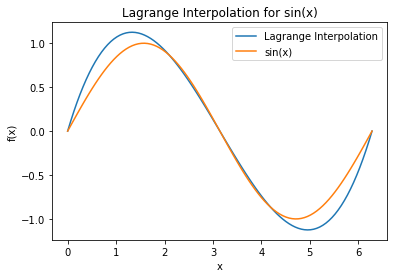

In [6]:
x_int = np.linspace(0, 2 * pi, 4)
y_int = np.sin(x_int)
x_plt = np.linspace(0, 2 * pi, 100)
y_plt = lagrange(x_plt, x_int, y_int)
y_true = np.sin(x_plt)
plt.plot(x_plt, y_plt, label = 'Lagrange Interpolation')
plt.plot(x_plt, y_true, label = 'sin(x)')
plt.legend()
plt.xlabel('x') 
plt.ylabel('f(x)')
plt.title('Lagrange Interpolation for sin(x)')
plt.show()